<a href="https://colab.research.google.com/github/qusaysellat/tensorflow/blob/master/qs_tf_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE AUTO-ENCODER FOR** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>THIS CODE IS ADOPTED FROM [Aymeric Damien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/autoencoder.ipynb) EXAMPLES

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [0]:
# first lets import the used libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# then we will import mnist dataset
from tensorflow.examples.tutorials.mnist import input_data

In [47]:
# and read it in a variable named 'mnist'
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [48]:
# lets try to play with this data set

# lets see the dimensions of train, validation, and test datasets - note that mnist is a named tupple
print(mnist.train._images.shape)
print(mnist.train._labels.shape)
print(mnist[1]._images.shape)
print(mnist[1]._labels.shape)
print(getattr(mnist, 'test')._images.shape)
print(getattr(mnist, 'test')._labels.shape)

(55000, 784)
(55000, 10)
(5000, 784)
(5000, 10)
(10000, 784)
(10000, 10)


In [66]:
# lets take a sample of our data and discover its values
print('the first 8 labels in the training set:')
print(mnist[0]._labels[:8, : ])

the first 8 labels in the training set:
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


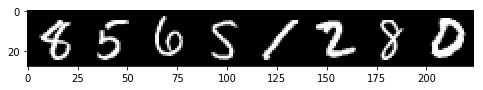

In [83]:
# now lets draw the sample we have just viewed

canvas = np.zeros((28, 28 * 8))
for i in range(8):
  canvas[:, 28 * i : 28 * (i + 1)] = mnist[0].images[i, :].reshape([28 ,28])
  
plt.figure(figsize = (8, 64))
plt.imshow(canvas, origin = 'upper', cmap ='gray')
plt.show()

In [0]:
# now we have to initialize important hyperparameters
LR = 0.01
Iterations = 40001
Batch = 128 

In [0]:
# then we define model sturcture

# number of features
F = mnist.train._images.shape[1]

# placeholder for input
X = tf.placeholder(dtype = 'float32', shape = (None, F), name = 'X')

# dimensions of hidden layers
H1 = 256
H2 = 128

# weights and biases
W = {
    'W1' : tf.Variable(tf.random_normal([F, H1])),
    'W2' : tf.Variable(tf.random_normal([H1, H2])),
    'W3' : tf.Variable(tf.random_normal([H2, H1])),
    'W4' : tf.Variable(tf.random_normal([H1, F]))
}

b = {
    'b1' : tf.Variable(tf.random_normal([1, H1])),
    'b2' : tf.Variable(tf.random_normal([1, H2])),
    'b3' : tf.Variable(tf.random_normal([1, H1])),
    'b4' : tf.Variable(tf.random_normal([1, F]))
}

In [0]:
# now lets start build the model

# first we define the encoder part
def encoder(x, W, b):
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W1']), b['b1']))
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W2']), b['b2']))
  return x

# then we do the decoder
def decoder(x, W, b):
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W3']), b['b3']))
  x = tf.nn.sigmoid(tf.add(tf.matmul(x, W['W4']), b['b4']))
  return x

# now we apply above functions on the given input
encoded_X = encoder(X, W, b)
decoded_X = decoder(encoded_X, W, b)

# define the target and predicted outputs
Yt = X
Yp = decoded_X

# define the loss function
loss = tf.reduce_mean((Yp - Yt) ** 2)

# define the optimization function
optimizer = tf.train.RMSPropOptimizer(LR).minimize(loss)

# initialize global variables
init = tf.global_variables_initializer()

In [54]:
# now we will train our constructed model

# first lets define a new session
sess = tf.Session()

# run the tf initializer
sess.run(init)

# now we will get the batches and run the optimizer on them
for i in range(Iterations):
  
  # get next batch
  batch_x, batch_y = mnist.train.next_batch(Batch)
  
  # run the optimizer
  _, l = sess.run([optimizer, loss], feed_dict = {X: batch_x})
  
  # display loss value
  if i % 1000 == 0 :
    print('Step %i: Minibatch Loss: %f' % (i, l))

Step 0: Minibatch Loss: 0.452922
Step 1000: Minibatch Loss: 0.142345
Step 2000: Minibatch Loss: 0.116727
Step 3000: Minibatch Loss: 0.108432
Step 4000: Minibatch Loss: 0.103900
Step 5000: Minibatch Loss: 0.097555
Step 6000: Minibatch Loss: 0.094323
Step 7000: Minibatch Loss: 0.090922
Step 8000: Minibatch Loss: 0.084827
Step 9000: Minibatch Loss: 0.080795
Step 10000: Minibatch Loss: 0.077213
Step 11000: Minibatch Loss: 0.074228
Step 12000: Minibatch Loss: 0.072365
Step 13000: Minibatch Loss: 0.069470
Step 14000: Minibatch Loss: 0.070808
Step 15000: Minibatch Loss: 0.066616
Step 16000: Minibatch Loss: 0.063758
Step 17000: Minibatch Loss: 0.063517
Step 18000: Minibatch Loss: 0.058289
Step 19000: Minibatch Loss: 0.055691
Step 20000: Minibatch Loss: 0.054350


Original Digits:


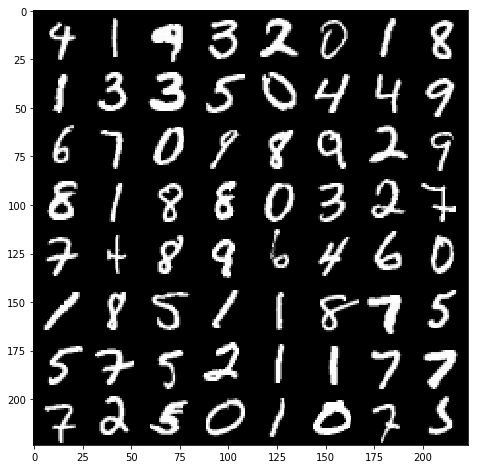

Reconstructed Digits:


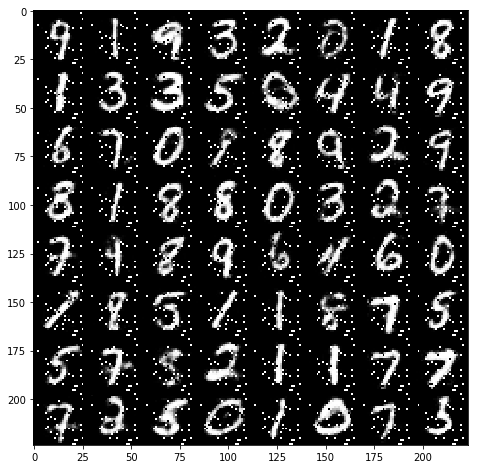

In [65]:
# lets now test our trained model

# it would be better if we visualize the results

# number of examples per each row/column
n = 8

# we would like not to waste the space, lets define canvases for drawing
canvas1 = np.zeros((28*n, 28*n))
canvas2 = np.zeros((28*n, 28*n))

for i in range(n) :
  
  # get the next batch
  batch_x, batch_y = mnist.test.next_batch(n)
  
  # calculate the predicted values
  decoded_x = sess.run(decoded_X, feed_dict = {X : batch_x})
  
  for j in range(n) :
     
      # draw the images of true labels
      canvas1[28 * i : 28 * (i + 1), 28 * j : 28 * (j + 1)] = batch_x[j].reshape([28, 28])
      
      # draw the images of predicted labels
      canvas2[28 * i : 28 * (i + 1), 28 * j : 28 * (j + 1)] = decoded_x[j].reshape([28, 28])

print('Original Digits:')      
plt.figure(figsize = (n, n))
plt.imshow(canvas1, origin = 'upper', cmap = 'gray')
plt.show()
  
print('Reconstructed Digits:')
plt.figure(figsize = (n, n))
plt.imshow(canvas2, origin = 'upper', cmap = 'gray')
plt.show()
  